[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PyGIS222/Fall2019/blob/master/LessonM63_SimpleGIS.ipynb)

(Note for Google Colab: Not all packages used in this notebook are available by default on Google Colab. Google Colab provides an install option, however, this has to be repeated each time you start a new session on their servers.)

## Notebook Lesson 6.3

# Simple GIS in Python

This Jupyter Notebook is part of Module 6 of the course GIS222 (Fall2019). This lesson is preparing you for the final project of the course. Carefully study the content of this Notebook and use the chance to reflect the material through the interactive examples.

### Introduction

The purpose of this notebook (and the previous) is to **prepare you for the final project**. We will show how you can retrieve any kind of NASA's science data with another smaller Python module **NetCDF4**. Using those science data, we will show how you can perform **simple GIS tasks** in Python based on the gained Python expertise so far. 

### Content:

* Part A: Retrieving & Analyzing Science Data: NetCDF
* Part B: Selecting and Analyzing Science Data for a Region

### Sources
Documentation pages of the modules [NetCDF4](http://unidata.github.io/netcdf4-python/netCDF4/index.html#section2), [Shapely](https://shapely.readthedocs.io/en/stable/index.html) and the [Python-GIS page about Shapely](https://automating-gis-processes.github.io/CSC18/lessons/L4/point-in-polygon.html).

---


# A. Retrieving & Analyzing Science Data: NetCDF

NASA has several data centers, that collect, store and distribute data from their Earth monitoring projects. These centers are represented in the web on the EARTHDATA website, bowered by the "Earth Observing System Data and Information System" ([EOSDIS](https://earthdata.nasa.gov/eosdis/daacs)).

This website has a vast archive of very interesting and exciting data, including all sorts of remote sensing data from visual sensors, other optical sensors like radar, gravimetric platforms, and many derivatives from them. Many other data kinds, like meteorological, ecological or geophysical datasets are also available. Some of these science data have global coverage and some up to 100 years of temporal coverage. Hence, they provide extremely valuable database for many geographical, geospatial or even geophysical analyses.

One of the most common and most easy to use data formats for such science data is the so called NetCDF format (`.nc`). [**NetCDF (Network Common Data Form)**](https://www.unidata.ucar.edu/software/netcdf/docs/faq.html#whatisit) is a set of interfaces for array-oriented data access. The netCDF libraries support a machine-independent format for representing scientific data. Together, the interfaces, libraries, and format support the creation, access, and sharing of scientific data. 

The Python library (module) for these data has the name [**netCDF4**](http://unidata.github.io/netcdf4-python/netCDF4/index.html). It provides an object-oriented python interface to the netCDF version 4 library. It cannot only read, but also create such archives. 

Here we want to discuss how to use this module to get access to any netcdf file and read it into a numpy array, which we are already able to plot and analyze.

To begin, let's import the package `Dataset` from the module netCDF4, which is all we need!

In [1]:
from netCDF4 import Dataset 

For this notebook, we have downloaded a [sample netCDF file from the website of the University Corporation for Atmospheric Research (UCAR)](https://www.unidata.ucar.edu/software/netcdf/examples/files.html). The file provides 24 time steps of sea surface temperatures collected for use by the IPCC. For this exercise we are looking into a tiny fraction of the dataset for this exerciese: the years 2001 and 2002. The dataset has a spatial resolution of 2 degree in longitudinal and 1 degree in latitudinal direction.

The file is named `tos_O1_2001-2002.nc` and stored in the folder `assignments_M6/data`. 

You will not be able to look into the file though a text editor, as the netCDF-file is not saved in a text format, but rather in a compressed archive. However, we can use the netCDF4 module to import the file and then look inside using some netCDF functions.

In [2]:
# reading the netCDF-file and saving the content to 'ncData'
ncData = Dataset('./data/tos_O1_2001-2002.nc')

Now, we can print out the basic information about the dataset stored in `ncData` using the print function:

In [3]:
# printing info for the netCDF dataset, as stored in the dataset itself
print(ncData)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment
    institution: IPSL (Institut Pierre Simon Laplace, Paris, France)
    source: IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v
    contact: Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
    project_id: IPCC Fourth Assessment
    table_id: Table O1 (13 November 2004)
    experiment_id: SRES A2 experiment
    realization: 1
    cmor_version: 0.96
    Conventions: CF-1.0
    history: YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed  At 16:37:23 on 01/11/2005, CMOR rewrote data to comply with CF standards and IPCC Fourth Assessment requirements
    references: Dufresne et al, Journal of Climate, 2015, vol XX, p 136
    comment: Test drive
    dimensions(sizes): lon(180), lat(170), time(24), bnds(2)
    variables(dime

This looks a bit cryptic. It has the structure similar to a dictionary. You see some keys (`title`, `source`, `history`, `variables`) and then some information related to that. The most important information is contained at the bottom of the text after `variables`. The content of this entry indicates exactly, which variable are stored inside the dataset, what their dimensions and data types are:

"**variables(dimensions)**: float64 **lon(lon)**, float64 lon_bnds(lon,bnds), float64 **lat(lat)**, float64 lat_bnds(lat,bnds), float64 **time(time)**, float64 time_bnds(time,bnds), float32 **tos(time,lat,lon)**"

You can see a temporal variable (`time`) and spatial coordinates (`lon`, `lat`). The actual data set has the name `tos` and is listed at the very end. You can ignore the bands (`bnds`) entries.

Now that we know the names of the variable inside the datasets, we can easily access specific information on them using the attribute (or key) `variables` and by referencing the name of the variable we are interested in (exactly as we are used to from dictionaries):

In [4]:
# printing info on variable 'lat'
ncData.variables['lat'] 

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    bounds: lat_bnds
    original_units: degrees_north
unlimited dimensions: 
current shape = (170,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [5]:
# printing info on variable 'lon'
ncData.variables['lon']

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    bounds: lon_bnds
    original_units: degrees_east
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [6]:
# printing info on variable 'tos'
ncData.variables['tos']

<class 'netCDF4._netCDF4.Variable'>
float32 tos(time, lat, lon)
    standard_name: sea_surface_temperature
    long_name: Sea Surface Temperature
    units: K
    cell_methods: time: mean (interval: 30 minutes)
    _FillValue: 1e+20
    missing_value: 1e+20
    original_name: sosstsst
    original_units: degC
    history:  At   16:37:23 on 01/11/2005: CMOR altered the data in the following ways: added 2.73150E+02 to yield output units;  Cyclical dimension was output starting at a different lon;
unlimited dimensions: time
current shape = (24, 170, 180)
filling on

These outputs provide us with the exact shape of each data variable. There is also more information on the content of the variables, for example units, longer descriptive names and other information.

We can see that our sea surface temperatures saved in the netCDF variable `tos` contains 24 map grids (every months during 2001-2002) and the data unit is *Kelvin*. There is also information about which values are indicating missing values: $10^{20}$.

To retrieve the content of the variables, we simply add the operator `[:]` to the same statement and assign the result to a variable. This creates a literal copy of the variable content to a numpy array. For example for the data variable `tos`:

In [7]:
# writing content of the variable 'tos' in ncData to a separate variable 'ncTos' (numpy array)
ncTos = ncData.variables['tos'][:]
ncTos

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [271.4374694824219, 271.4379577636719, 271.43841552734375, ...,
          271.4361877441406, 271.4365539550781, 271.4369812011719],
         [271.4451904296875, 271.44525146484375, 271.4453125, ...,
          271.445068359375, 271.4450988769531, 271.44512939453125],
         [271.4591979980469, 271.45916748046875, 271.4591369628906, ...,
          271.459228515625, 271.459228515625, 271.4591979980469]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [271.4344482421875, 271.4346008300781, 271.434814453125, ...,
          271.4345397949219, 271.4343566894531, 271.434326171875],
         [271.44573974609375, 271.4457092285156, 271.4456787109375, ...,
          271.4458312988281, 271.44580078125, 271.44573974609375],
         [271.458007812

However, this is not yet a simple numpy array, but a `masked_array`. We have to consider that some netCDF variables come with two objects, a `data` and a `mask` object inside the array. For the lat/lon variables the mask object is empty, but for the data variable `tos` we have a `mask` and a `data` object. We can reference each of them with the dot-operator. So let's save all of the data we need into new variables:

In [8]:
# writing content of all other interesting variables in ncData to separate numpy arrays
ncLat = ncData.variables['lat'][:].data
ncLon = ncData.variables['lon'][:].data
ncTime = ncData.variables['time'][:].data
ncTos_data = ncData.variables['tos'][:].data
ncTos_mask = ncData.variables['tos'][:].mask

After reading all variables, we should close the netCDF-file:

In [ ]:
# closing the netCDF file
ncData.close()

And now, let's check the dimensions of the variables:

In [9]:
print("Size of longitude array:",ncLon.shape)
print("Size of latitude array:",ncLat.shape)
print("Size of time array:",ncTime.shape)
print("Size of data array:",ncTos_data.shape)
print("Size of data mask array:",ncTos_mask.shape)

Size of longitude array: (180,)
Size of latitude array: (170,)
Size of time array: (24,)
Size of data array: (24, 170, 180)
Size of data mask array: (24, 170, 180)


You can see, that we have 1 dimensional arrays for longitude, latitude and time. But we have a 3-dimensional array for the dataset. This is because these are 2D maps for different time steps. The first of the three dimensions stands for time (24 steps), the second for latitudes (170 rows in the maps) and the third for longitudes (180 columns in the maps), which you can read from the respective listed dimensions.

Now we need only two more steps to plot some of the data: we have to create a meshgrid, like we did before. But this time, we have the lat/lon vectors (`ncLon` and `ncLat`) already available:

In [10]:
import numpy as np

# converting the 1D coordinate arrays to a meshgrid
ncLonGrid, ncLatGrid = np.meshgrid(ncLon,ncLat)

In [11]:
ncLon.shape  # shape of the 1D coordinate array for lon

(180,)

In [12]:
ncLonGrid.shape # shape of the converted 2D meshgrid array for lon

(170, 180)

Again we have created two meshgrids, one for latitudes and one for longitudes, which have the same dimention as each of the maps in the datasets (for one time step).

Now we can plot the map of one time step from the spatiotemporal dataset (time series of 24 maps). For that, let's extract just the first month:

In [13]:
# assigning first 'tos' map in the time series of 24 maps to a new variable name
ncTos_data_month1 = ncTos_data[0]

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

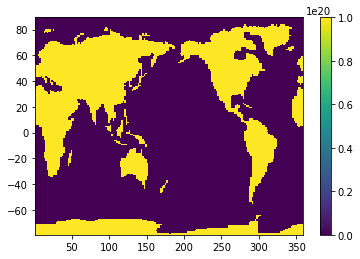

In [15]:
# plotting the first 'tos' map
plt.pcolormesh(ncLonGrid,ncLatGrid, ncTos_data[0]) 

# adding a colorbar
plt.colorbar()

Oh, we see the continents but no data. Any idea what happended? Have a look at the colorbar! Yes, remember our missing values are of size 1e20. Let's set them to `np.nan`. And transfer the data from Kelvin to Celsius! Then we plot them again.

In [16]:
# converting missing values in 'tos' data to np.nan
ncTos_data[ncTos_data==1e20] = np.nan

# converting 'tos' data from Kelvin to Celsius
ncTos_data = ncTos_data - 273.15

Text(0.5, 1.0, 'Sea Surface Temperature, Jan/2001')

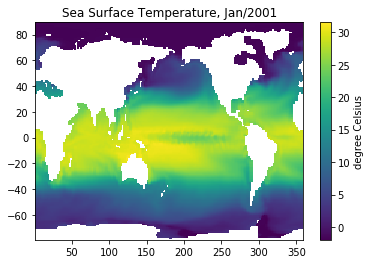

In [17]:
# plotting the first 'tos' map (after replacing missing values with nan)
plt.pcolormesh(ncLonGrid,ncLatGrid, ncTos_data[0]) 

# adding a colorbar
cbar = plt.colorbar()

# adding labels
cbar.set_label('degree Celsius')
plt.title("Sea Surface Temperature, Jan/2001")

This map shows the global sea surface temperature during the month of January 2001 (since the dataset contains 24 months during 2001 to 2002 and this is the first of the 24 maps in the time series).

Now you can also see why we had a mask object in the dataset: the mask provides information about where the dataset is empty or masked-out. This makes sense here, since we have **sea** surface temperatures.

We can also print the mask aray. However it makes no sense to add a colorbar, as the mask array contains only True and False values (see above, where we looked into the `tos` dataset).

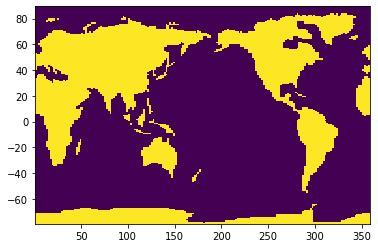

In [18]:
# plotting the mask object of the 'tos' data
plt.pcolormesh(ncLonGrid,ncLatGrid, ncTos_mask[0]) 

But let's get back to the dataset. Now we want to print the month of June 2001:

Text(0.5, 1.0, 'Sea Surface Temperature, Jun/2001')

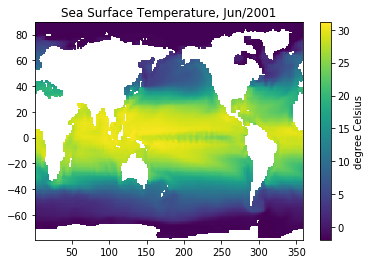

In [19]:
# plotting the sixth map in the 'tos' time series
plt.pcolormesh(ncLonGrid,ncLatGrid, ncTos_data[5]) 

# adding a colorbar
cbar = plt.colorbar()

# adding labels
cbar.set_label('degree Celsius')
plt.title("Sea Surface Temperature, Jun/2001")

We could do this 24 times, but may visually not see much difference, because variations are small compared to absolute values. So for that, it might be good to aggregate the data in some way. We can, for example caluclate a simple statistic value, like the **mean** sea surface temperature over the entire globe for each of the 24 months! 

For that we are adding a for-loop over the time-dimension of the array in the cell below, so we can caluclate the mean temperature for each month in the time series.
Also, instead of the function `mean()` we will be using the function [`nanmean()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanmean.html), which ignores nan values in the dataset. This spares us the step of removing the np.nan values before calculating our statistical value. 

In [20]:
# getting the number of months in the dataset (we know its 24)
NoOfMonths = len(ncTime)     

# creating a numpy array of the same length, containing zeros
monthlyMeanTos = np.zeros(NoOfMonths) 

# iterating over each month in a for-loop: estimating mean 'tos' over the globe
for t in range(NoOfMonths):            
    
    # using nanmean to make sure nan values are ignored
    monthlyMeanTos[t] = np.nanmean(ncTos_data[t]) 

<div class="alert alert-info">

**Note:**

Use the chance to visit the documentation pagest of functions we introduce and linked. Also search for more similar ones, that you think might be useful. It is not possible to provide examples for all the hundreds of available functions (alone for the numpy package), but there are a lot of useful ones you may need in your future analyses.

</div>

Now we have calculated global mean sea surface temperatures for each month during 2001-2002 and stored this as a time series in the array monthlyMeanTos. Let's have a quick look at the time series, by plotting it. We actually need only one line of code for that, but we will add some more lines for annotations!!!

Text(0, 0.5, 'Temperature (Celsius)')

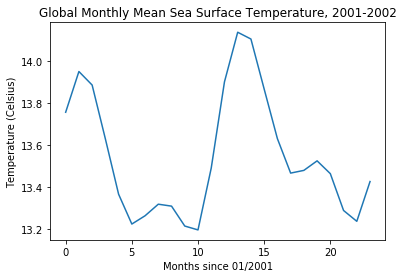

In [21]:
# plotting the time series of mean 'tos' (over the entire globe)
plt.plot(range(NoOfMonths),monthlyMeanTos)

# adding labels
plt.title("Global Monthly Mean Sea Surface Temperature, 2001-2002")
plt.xlabel('Months since 01/2001')
plt.ylabel('Temperature (Celsius)')

As you can see, on global average, the sea surface temperature varies only by about 1 degree Celsius. But we can see a clear seasonal pattern, with maximum global temperatures during the months January-March.

We could also estimate the mean sea surface temperature for the **northern hemisphere**! For that we just need to slice the data arrays in a way that we receive only the northern part of the global dataset.

For that let's inspect our latitude array!

In [22]:
# printing out the 1D latitude array from the netCDF dataset
ncLat

array([-79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5,
       -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5,
       -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5,
       -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5, -44.5,
       -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5, -35.5,
       -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5, -26.5,
       -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5, -17.5,
       -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,  -8.5,
        -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,   0.5,
         1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,
        19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,
        28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,
        37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,  45.5,
        46.5,  47.5,

Looking at the list of latitudes above, we just need to cut off the top half of the data arrays in latitude direction! Let's try this! 

We could again use the `np.abs()` and `np.argmin()` function to estimate the index of the equator and the north pole in the latitude array. But let's keep it short at this point. Those are exaclty the indexes 80:170 in the latitude component of the array. In the three array dimensions of the data sets, we will only slice the (middle) latitudinal component. We will not slice the time steps and longitudinal components in the array. However, we do have to slice the lat and lon grids equally: 

In [23]:
# keep all time steps and longitudes, slice only along latitude
ncTos_data_north = ncTos_data[:,80:170,:]

# the same for the meshgrids containing coordinates
ncLonGrid_north = ncLonGrid[80:170,:]
ncLatGrid_north = ncLatGrid[80:170,:]

Now we can test-plot the selection and we will see if we did cut off the correct hemisphere!

Text(0.5, 1.0, 'Sea Surface Temperature, Jun/2001')

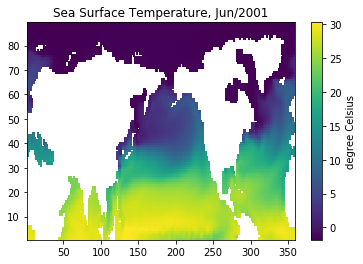

In [24]:
# plotting the first map in the 'tos' data sliced to the northern hemisphere
plt.pcolormesh(ncLonGrid_north, ncLatGrid_north, ncTos_data_north[1]) 

# adding a colorbar and labels
cbar = plt.colorbar()
cbar.set_label('degree Celsius')
plt.title("Sea Surface Temperature, Jun/2001")

This looks good!. Now we will calculate monthly averages from this sliced dataset and plot them for the northern hemisphere only! 

In [25]:
# getting the number of months in the dataset (we know its 24)
NoOfMonths = len(ncTime)     

# creating a numpy array of that length
monthlyMeanTOS_north = np.zeros(NoOfMonths)  

# iterating over each month in a for-loop: estimating mean 'tos' for northern hemisphere
for t in range(NoOfMonths):            
    monthlyMeanTOS_north[t] = np.nanmean(ncTos_data_north[t])

Text(0, 0.5, 'Temperature (Celsius)')

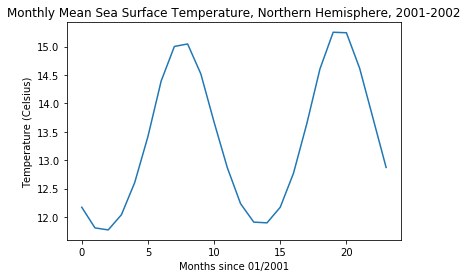

In [26]:
# plotting time series of mean 'tos' in northern hemisphere
plt.plot(range(NoOfMonths),monthlyMeanTOS_north)

# adding labels to the plot
plt.title("Monthly Mean Sea Surface Temperature, Northern Hemisphere, 2001-2002")
plt.xlabel('Months since 01/2001')
plt.ylabel('Temperature (Celsius)')

This time series clearly shows a larger variability (seasonal up and down) than the previous results for the global averages. Also we are now seeing the warmest months in the summer, as we would expect for the northern part of the planet!!!

### Conclusion

The netCDF data provide a wide range data sets from sciene data archives all around the world, including NASA's data centers. These data are useful for many data analysis projects.

---
# B. Selecting and Analyzing Science Data for a Region

With the knowledge previous lesson on the modules **Shapely**, we are able to decide if points locate inside a specific geographical region, if we convert the points and the polygon for the region into shapely objects. 

### Creating a spatial mask for the raster dataset

Now the goal is to utilize this knowledge, to calculate map statistics for science data within a region. For that we have to create a mask for the raster data grid of the science dataset (netCDF archive). The mask would aquire 0 (or `nan`) for raster points that fall outside the region and 1 for raster points that fall inside the region, e.g. for a raster grid covering the the state of Arizona:

<img src="./img/M63_spatialMask.png" width="200" />

Once we have that mask, to mask out all points outside the region. Based on the mask, we can then calculate map statistics only for points inside the region. 

Here we want to do this for **sea surface temperatures within the Atlantic ocean**. For that we are providing the outline of deeper portions of the Atlantic given as a coordinate list of polygon vertices stored in a .csv-file `assignments_M6/data/Atlantic.csv`. Hence, the file contains the boundaries of the deeper Atlantic. We can import the data and look at them first:

In [27]:
# reading the boundary of the Atlantic from csv file using numpy
filename = "./data/Atlantic.csv" 
AtlanticBndry = np.genfromtxt(filename, delimiter=',', skip_header=1) 

In [28]:
# printing the content of the Atlantic boundary to screen
AtlanticBndry

array([[ 4.46575507e+01,  2.99575338e+02],
       [ 4.46575507e+01,  3.03424768e+02],
       [ 4.51885065e+01,  3.08203370e+02],
       [ 4.77494210e+01,  3.10832823e+02],
       [ 5.31631090e+01,  3.10712519e+02],
       [ 5.71350120e+01,  3.13645667e+02],
       [ 6.27444711e+01,  3.25217377e+02],
       [ 6.43482122e+01,  3.33102437e+02],
       [ 6.00715692e+01,  3.40452917e+02],
       [ 5.60622165e+01,  3.48070687e+02],
       [ 4.81771561e+01,  3.48337978e+02],
       [ 4.34629002e+01,  3.49617922e+02],
       [ 3.65604748e+01,  3.49883400e+02],
       [ 3.24455674e+01,  3.49219705e+02],
       [ 2.84633989e+01,  3.43644670e+02],
       [ 2.18264514e+01,  3.41653585e+02],
       [ 1.28002029e+01,  3.40989891e+02],
       [ 6.00387095e+00,  3.38141872e+02],
       [ 1.08966190e-01,  3.31645446e+02],
       [-1.40286470e+00,  3.22008221e+02],
       [ 3.90669327e+00,  3.12583755e+02],
       [ 9.21625125e+00,  3.03690246e+02],
       [ 1.74460661e+01,  3.02362856e+02],
       [ 1.

You see latitudinal coordinates in the first column and longitudinal cooridnates in the second column.

Let's plot the boundary into our last map of sea surface temperatures, to see where this is located and if the import worked well!

Text(0.5, 1.0, 'Sea Surface Temperature, Jun/2001')

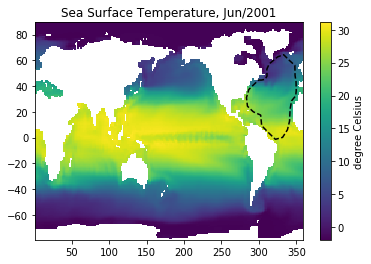

In [29]:
# plotting the 'tos' data for the month of June and the AtlanticBndry
plt.pcolormesh(ncLonGrid,ncLatGrid, ncTos_data[5]) 
plt.plot(AtlanticBndry[:,1], AtlanticBndry[:,0], 'k--')
cbar = plt.colorbar()

# adding labels
cbar.set_label('degree Celsius')
plt.title("Sea Surface Temperature, Jun/2001")

You can see the boundary of the deeper Atlantic ocean is now outlined between Europe and North America. In a next step, before we can generate a mask for this region, we have to convert the outline of the Atlantic (which we have saved in a numpy array) into a shapely Polygon.

### Create a Shapely Polygon from a boundary saved in a textfile

Let's use the boundary for the deep Atlantic to generate a shapely Polygon. Remember, shapely Polygon objects only accept coordinate-tuples as input. For that, we have to index each coordinate pair in `AtlanticBndry` and convert it to a tuple. For the first coordinate pair in the array, this would look like this:

In [30]:
# transforming the first row in AtlanticBndry to a tuple
tuple(AtlanticBndry[0,:])

(44.65755072, 299.5753383)

Now, we want to restructure the entire array into a list that contains a tuple for each coordinate pair (row in the array). We can do this in a for-loop!

In [31]:
# Create an empty list
AtlanticList = []

# Convert all coordinate pairs in the array to a tuple
# and append them to the list
for i in range(len(AtlanticBndry)):
     AtlanticList.append(tuple(AtlanticBndry[i,:]))
        

Now we have a list of coordinate tuples:

In [32]:
# printing out the AtlanticList
AtlanticList

[(44.65755072, 299.5753383),
 (44.65755072, 303.4247678),
 (45.18850652, 308.20337),
 (47.74942097, 310.8328232),
 (53.16310901, 310.712519),
 (57.13501196, 313.6456669),
 (62.74447108, 325.2173767),
 (64.34821219, 333.1024371),
 (60.07156924, 340.4529172),
 (56.06221648, 348.0706874),
 (48.17715605, 348.3379776),
 (43.46290018, 349.6179222),
 (36.56047481, 349.8834001),
 (32.44556738, 349.2197054),
 (28.4633989, 343.6446695),
 (21.82645143, 341.6535852),
 (12.80020288, 340.9898905),
 (6.003870948, 338.1418717),
 (0.10896619, 331.6454461),
 (-1.402864703, 322.0082207),
 (3.906693271, 312.5837553),
 (9.216251245, 303.6902457),
 (17.44606611, 302.3628562),
 (19.96810614, 292.540174),
 (24.34849147, 284.708576),
 (30.98543894, 283.3811865),
 (37.22416956, 286.4341823),
 (40.80812119, 292.540174),
 (44.65755072, 299.5753383)]

And we can generate a shapely Polygon from that:

In [33]:
# transforming the AtlanticList to a shapely polygon
from shapely.geometry import Point, Polygon
atlanticPoly = Polygon(AtlanticList)

Shapely gives us even a very quick glance at the polygon, if we just execute its name:

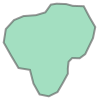

In [34]:
# printing out the shapely polygon atlanticPoly
atlanticPoly

With that we are one step closer to selecting raster points inside the polygon! However, first we need to perform some practical steps, for handeling the large global dataset of sea surface temperatures.

### Reduce the global dataset to a map frame emcompassing the polygon

Since a global dataset has a lot of points, we would have to run the PIP check many times. But we actually know that our area locates only in the northwest (NW) portion of the global dataset. So before we attempt to generate the mask, we reduce our global dataset to a new dataframe that is encompassing the atlantic boundaries, but not much more. We have done something like this in the previous notebook so, below we will add the entire code to do the same here.

For that, we have been selecting the boundaries of the new data frame visually from the maps above:

In [35]:
# setting boundaries of the new data frame for our analysis
latMin = -2
latMax = 80
lonMin = 260  # lon coordinates in this dataset go from 0...360!!!
lonMax = 360  # lon coordinates in this dataset go from 0...360!!!

# Finding indexes in the datasets that belong to the new boundaries
idx_latMax = np.argmin(np.abs(ncLat-latMax))
idx_latMin = np.argmin(np.abs(ncLat-latMin))
idx_lonMax = np.argmin(np.abs(ncLon-lonMax))
idx_lonMin = np.argmin(np.abs(ncLon-lonMin))

# reducing the data and coordinate arrays to this frame
# only adjusting coordinate dimensions, not the time dimension (first one)
ncTos_NW = ncTos_data[:,idx_latMin:idx_latMax,idx_lonMin:idx_lonMax]
ncLon_grid_NW = ncLonGrid[idx_latMin:idx_latMax,idx_lonMin:idx_lonMax]
ncLat_grid_NW = ncLatGrid[idx_latMin:idx_latMax,idx_lonMin:idx_lonMax]

# reducing also the 1D coordinate arrays
ncLon_NW = ncLon[idx_lonMin:idx_lonMax]
ncLat_NW = ncLat[idx_latMin:idx_latMax]

To control our code, let's print the reduced dataset to a map, before we continue to create the mask for the atlantic:

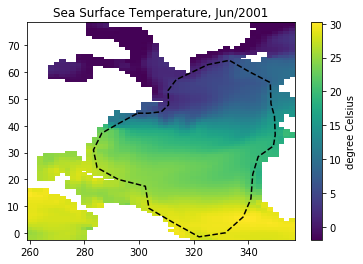

In [36]:
# plotting 'tos' and AtlanticBndry for the new northwest data frame
plt.pcolormesh(ncLon_grid_NW,ncLat_grid_NW, ncTos_NW[5]) 
plt.plot(AtlanticBndry[:,1], AtlanticBndry[:,0], 'k--')
cbar = plt.colorbar()

# adding title and label to the colorbar
plt.title("Sea Surface Temperature, Jun/2001")
cbar.set_label('degree Celsius')

This looks good. Now we have a smaller datagrid, which will be faster to process. The reduced dataset has the shape:

In [37]:
# receiving shape/dimensions of ncTOS_NW
ncTos_NW.shape

(24, 82, 50)

This is 24 time steps, 82 latitudinal grid rows and 50 longitudinal grid columns. The latter two should and do match the map above. 

### Select raster points inside the polygon & create the spatial mask

Now, we want to find all the grid points of this reduced sea surface temperature dataset that fall inside the polygon. 

The module shapely provides two functions for that `within()` and `contain()`. Since we will have **many points and just one polygon**, the goal will be to:
* iterate over all points in the 2D raster data array, 
* generate a shapely Point for each coordinate pair, and
* then check, one at a time, if it is `within()` the polygon specified!

The check in the last step will return True for data points inside the polygon and false for points outside the polygon! When checking each raster point, whether it is inside the boundary, we save the results in a new array **`atlanticMask`** in the form of zeros and ones. This will be the **spatial mask** we want to get for our dataset of the size (82x50). (We will not touch the dimension of the time series.)

For checking all the raster points in the 2D data array, we need a nested for loop that iterates over all items in the array. This has to be done in two directions: in longitude and in latitude direction. Below, we have formulated algorithm for that in pseudo code:

``` 
SET atlanticMask to numpy array containing 0 and of shape of raster data set
FOR latitude-iteration
    FOR longitude-iteration
        convert lat/lon pair to shapely point
        check if point is inside polygon
        assign current item in atlanticMask to integer value of check (0/1)
    ENDFOR
ENDFOR
```

So let's code this pseudo code into Python. You have to be very careful to index the lat/lon dimensions at their right positions during indexing.

In [38]:
# mask array containing only 0, of size lon x lat
atlanticMask = np.zeros(ncTos_NW.shape[1:])

# nested loop to check if points inside polygon and fill the mask

# iterate through longitude array
for lo_i in range(len(ncLon_NW)):

    # iterate through latitude array
    for la_i in range(len(ncLat_NW)):
        
        # set current lon/lat
        lo = ncLon_NW[lo_i]  # current longitude coord in iteration
        la = ncLat_NW[la_i]  # current latitude coord in iteration
        
        # create current point
        currentPoint = Point(la,lo)
        
        # check if point inside: returns true or false
        check = currentPoint.within(atlanticPoly)
        atlanticMask[la_i,lo_i] = int(check)


Running this creates the new mask array `atlanticMask`, which contains 0 outside and 1 inside the Atlantic Polygon. Now, let's print that new mask, to check if your result is correct!

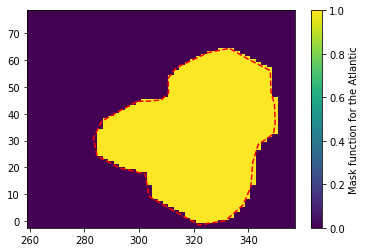

In [39]:
# plotting the atlanticMask
plt.pcolormesh(ncLon_grid_NW,ncLat_grid_NW, atlanticMask)

# plotting the Atlantic boundaries (AtlanticBndry) 
plt.plot(AtlanticBndry[:,1], AtlanticBndry[:,0], 'r--')

# adding colorbar and label for the colorbar
cbar = plt.colorbar()
cbar.set_label('Mask function for the Atlantic')

As you can see, that worked perfectly. We now have a mask array `atlanticMask`, which contains 0 outside the polygon and 1 inside the polygon.

From that we can repeat our time series analysis from above: estimate the average sea surface temperature for each month in the time series and plot the graph. This time, we only have to multiply each monthly map with the mask array and use the `nanmean()` function. For making that work, we convert all 0 values in the mask array to `np.nan` values:

In [40]:
# assigning np.nan values to 0 values in atlanticMask
atlanticMask[atlanticMask==0] = np.nan  

In [41]:
atlanticMask

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

When plotting this, it looks like the following (nan values are maked out in white):

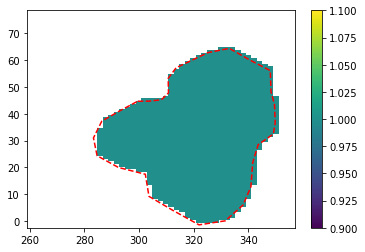

In [42]:
# plotting the atlanticMask, containing nan instead of 0
plt.pcolormesh(ncLon_grid_NW,ncLat_grid_NW, atlanticMask) 
plt.plot(AtlanticBndry[:,1], AtlanticBndry[:,0], 'r--')
cbar = plt.colorbar()

Now, let's use our data set for the NW of the globe and repeat the time series analysis, to estimate the mean sea surface temperatures inside the Atlantic polygon and for each month:

In [43]:
# getting the number of months in the dataset (we know its 24)
NoOfMonths = len(ncTime)     

# creating a numpy array of that length
monthlyMeanTos_NW = np.zeros(NoOfMonths)  

# in a for loop: estimating the mean global SST per month
for t in range(NoOfMonths):           
    monthlyMeanTos_NW[t] = np.nanmean(ncTos_NW[t]*atlanticMask) # multiply dataset with polygon mask

Text(0, 0.5, 'Temperature (Celsius)')

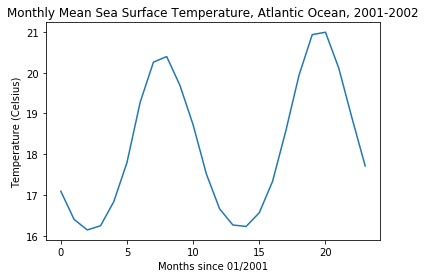

In [44]:
# plotting the time series
plt.plot(range(NoOfMonths),monthlyMeanTos_NW)

# adding title and axes labels
plt.title("Monthly Mean Sea Surface Temperature, Atlantic Ocean, 2001-2002")
plt.xlabel('Months since 01/2001')
plt.ylabel('Temperature (Celsius)')

Our time variable from the netCDF dataset contained days since January 01, 2001. We can also use that information for adjusting the labels in the x-axis.

### Making use of the time vector in the netCDF dataset

The netCDF dataset provided us also with an array containing information on the time stamps of the 24 maps of sea surface temperatures during 2001-2002.

For that let's have a closer look to the time variable of the netCDF file. Let's first print out the variable information again:

In [45]:
# printing infor for variable 'time' in the netCDF file
ncData.variables['time']  

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: time
    units: days since 2001-1-1
    axis: T
    calendar: 360_day
    bounds: time_bnds
    original_units: seconds since 2001-1-1
unlimited dimensions: time
current shape = (24,)
filling on, default _FillValue of 9.969209968386869e+36 used

And looking into the exact content of the variable, we see the following:

In [ ]:
# printing the content of the 'time' variable from the netCDF file
ncTime   

You can see the time variable contains a 1D array, with running numbers from 0 to 705. And from the variable information we can receive the following info on the units of these numbers:
    
    units: days since 2001-1-1
  
That means that the running numbers from 0 to 705 for the time stamps of the 24 maps indicate how many days have passed since January 1, 2001 when the maps were recorded.

Now we make use of that information to convert our running numbers to actual dates. We have done that already during the course module 4 (in lesson notebook `LessonM45_matplotlib`), were we converted dates given as strings into a date format using the method `datetime()` from the module `datetime` (they indeed have same names!). The method `datetime()` provides its own object type for dates and it comes with attributes for year, month, day, hour and minute. 

We can use this function again, but this time, we are given days since January 1, 2001 instead of strings, which works a bit different. 



For that, we can make use of another function in the module `datetime`, which is called `timedelta`. It allows to add a certain number of days to a defined date `datetime()` function. So let's import both functions from the datetime module first:

In [47]:
# importing functions datetime and timedelta from the datetime module
from datetime import datetime
from datetime import timedelta

Now we want to get the date for the first entry in `ncTime`, which is 15 days after January 1, 2001. For that we would have to define the same date using the `datetime()` function and then add the 15 days to it using the `timedelta()` function:

In [48]:
datetime(2001, 1, 1) + timedelta(15)   # adding 15 days to the date 2001/01/01

datetime.datetime(2001, 1, 16, 0, 0)

Now we got the date for January 16, 2001, which is exactly 15 days after Januar 1, 2001. Using a list comprehension, we can do the same for all items in the time array `ncTime` and assign the outcome to a new variable `ncTime_date`:

In [59]:
# adding number of days in ncTime to the date 2001/01/01
ncTime_date = [ datetime(2001, 1, 1) + timedelta(date) for date in ncTime ]
ncTime_date

[datetime.datetime(2001, 1, 16, 0, 0),
 datetime.datetime(2001, 2, 15, 0, 0),
 datetime.datetime(2001, 3, 17, 0, 0),
 datetime.datetime(2001, 4, 16, 0, 0),
 datetime.datetime(2001, 5, 16, 0, 0),
 datetime.datetime(2001, 6, 15, 0, 0),
 datetime.datetime(2001, 7, 15, 0, 0),
 datetime.datetime(2001, 8, 14, 0, 0),
 datetime.datetime(2001, 9, 13, 0, 0),
 datetime.datetime(2001, 10, 13, 0, 0),
 datetime.datetime(2001, 11, 12, 0, 0),
 datetime.datetime(2001, 12, 12, 0, 0),
 datetime.datetime(2002, 1, 11, 0, 0),
 datetime.datetime(2002, 2, 10, 0, 0),
 datetime.datetime(2002, 3, 12, 0, 0),
 datetime.datetime(2002, 4, 11, 0, 0),
 datetime.datetime(2002, 5, 11, 0, 0),
 datetime.datetime(2002, 6, 10, 0, 0),
 datetime.datetime(2002, 7, 10, 0, 0),
 datetime.datetime(2002, 8, 9, 0, 0),
 datetime.datetime(2002, 9, 8, 0, 0),
 datetime.datetime(2002, 10, 8, 0, 0),
 datetime.datetime(2002, 11, 7, 0, 0),
 datetime.datetime(2002, 12, 7, 0, 0)]

This looks great, because now we can use these dates to add them to our plots, as we have done before in course module 4. 

### Adding dates to the time series graph

For that we just add the variable `ncTime_date` to the `plot()` function, together with the time series `monthlyMeanTos_NW`. Since the date labels are relatively long, they might overlap. For that let's also enlarge the plot a bit (using the `rcParams` attribute of the pyplot package):

Text(0, 0.5, 'Temperature (Celsius)')

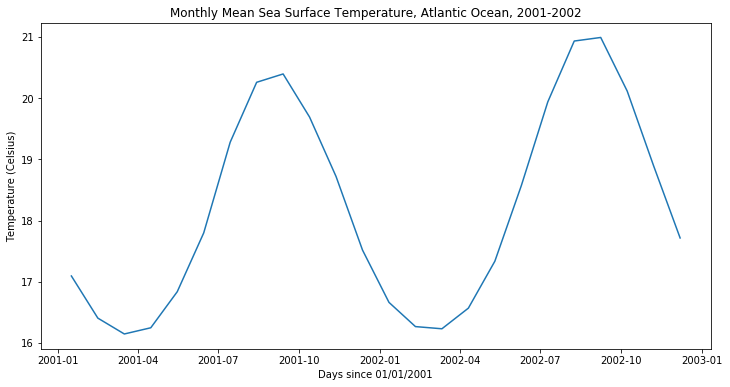

In [50]:
# setting the size of the plot
plt.rcParams['figure.figsize'] = [12, 6]   

# plotting time series with correct dates
plt.plot(ncTime_date,monthlyMeanTos_NW)    

# adding title and axes labels
plt.title("Monthly Mean Sea Surface Temperature, Atlantic Ocean, 2001-2002")
plt.xlabel('Days since 01/01/2001')
plt.ylabel('Temperature (Celsius)')

### Compare sea surface temperatures in the Atlantic to those in the seas of northern hemisphere 

Now we can plot the time series of mean sea surface temperatures in the atlancic together with the time series for the northern hemisphere to compare them in one graph. And you can also export the final graph to an image file. For that we are adding the the pyplot function `plt.savefig('filename.png')` to the bottom of the next code cell:

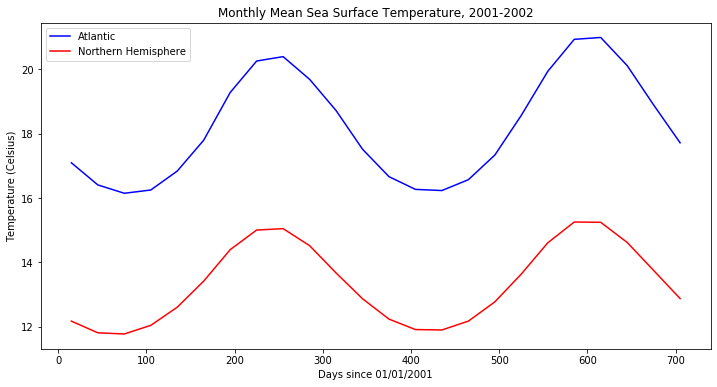

In [51]:
# setting the size of the plot
plt.rcParams['figure.figsize'] = [12, 6]   

# plotting time series with correct dates and adding labels for each time series
line1, = plt.plot(ncTime,monthlyMeanTos_NW, 'b',label='Atlantic')
line2, = plt.plot(ncTime,monthlyMeanTOS_north, 'r',label='Northern Hemisphere')

# adding title and axes labels
plt.title("Monthly Mean Sea Surface Temperature, 2001-2002")
plt.xlabel('Days since 01/01/2001')
plt.ylabel('Temperature (Celsius)')

# adding a legend
plt.legend(handles=[line1, line2])

# save the image to a file
plt.savefig('simpleGISresult.png')

As you can see, the atlantic is on average about 4 degree Celsius warmer than the rest of the sea in the norther hemisphere. This is not surprising, as the oceans of the northern hemisphere include also those of the arctic!

### Print a map of mean temperatures per pixel

Instead of averaging the sea surface temperatures over the space. We can also average them over time. From this we could, for example, analyze the global mean sea surface temperature for a certain year and study it's spatial distribution. Then we could compare this to a second year.

Let's do this for the `tos` data for the data frame covering the atlantic, which we named `ncTos_NW` above. Remember the shape of that dataset?

In [52]:
ncTos_NW.shape

(24, 82, 50)

Again, we have 24 time steps, 82 latitudinal grid rows and 50 longitudinal grid columns. Before we have calculated the mean averaging over certain grid points (those within our Atlantic Boundary).

Now we want to calculate a mean for each grid point, averaging over the first 12 time steps (for the year 2001). For that we have to iterate over the grid points in latitude and longitude direction, similarly to when we checked the grid-points location inside or outside the Atlantic polygon. Then, for each grid-point, we average the time series for 2001 (the first 12 records in the time series for each grid point: 

In [53]:
# generate new array of same spatial size as the tos dataset 
#   should receive average temperatures during the first year (2001)
average2001_NW = np.zeros(ncTos_NW.shape[1:])

# nested loop to check if points inside polygon and fill the mask

# iterate through longitude array
for lo_i in range(len(ncLon_NW)):
    
    # iterate through latitude array
    for la_i in range(len(ncLat_NW)):
        
        # average over the first 12 records in the time series for current grid points
        # for that we slice out the time series of the current grid point from ncTos_NW:
        curr_timeSeries = ncTos_NW[:12,la_i,lo_i]
          
        # Then, we have to catch those cases with any nan entries
        # (the nanmean function creates a warning if all entries are nan)
        if (np.any(np.isnan(curr_timeSeries))):
            # assign np.nan to resulting grid point, if nan value in time series
            average2001_NW[la_i,lo_i] = np.nan
        else:
            # assign mean of time series to current grid point
            average2001_NW[la_i,lo_i] = np.nanmean(curr_timeSeries)
            

Now we can plot a map of mean sea surface temperatures during 2001, which we saved in the new array `average2001_NW`!

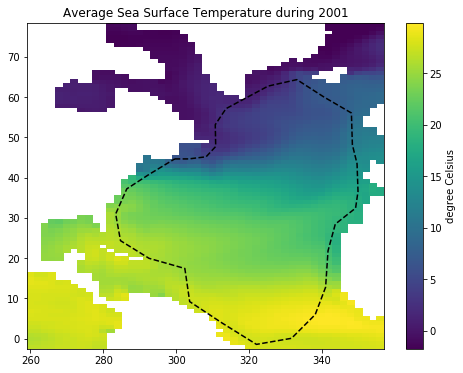

In [54]:
# plotting map of mean temperatures for 2001
plt.rcParams['figure.figsize'] = [8, 6]   
plt.pcolormesh(ncLon_grid_NW,ncLat_grid_NW, average2001_NW) 
plt.plot(AtlanticBndry[:,1], AtlanticBndry[:,0], 'k--')
cbar = plt.colorbar()

# adding title and label to the colorbar
plt.title("Average Sea Surface Temperature during 2001")
cbar.set_label('degree Celsius')

And of course, the north is warmer than the south.

To get the same result for 2002:

In [55]:
# generate new array of same spatial size as the tos dataset 
#   should receive average temperatures during the first year (2001)
average2002_NW = np.zeros(ncTos_NW.shape[1:])

# nested loop to check if points inside polygon and fill the mask

# iterate through longitude array
for lo_i in range(len(ncLon_NW)):
    
    # iterate through latitude array
    for la_i in range(len(ncLat_NW)):
        
        # average over the first 12 records in the time series for current grid points
        # for that we slice out the time series of the current grid point from ncTos_NW:
        curr_timeSeries = ncTos_NW[12:,la_i,lo_i]
          
        # Then, we have to catch those cases with any nan entries
        # (the nanmean function creates a warning if all entries are nan)
        if (np.any(np.isnan(curr_timeSeries))):
            # assign np.nan to resulting grid point, if nan value in time series
            average2002_NW[la_i,lo_i] = np.nan
        else:
            # assign mean of time series to current grid point
            average2002_NW[la_i,lo_i] = np.nanmean(curr_timeSeries)
            

Now we can also add both maps, for 2001 and 2002 into two subplots:

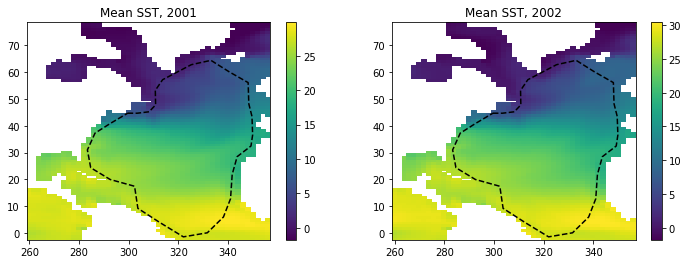

In [56]:
# plotting map of mean temperatures for 2001 and 2002 in subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# plotting map for 2001 in the left subplot
left = axes[0].pcolormesh(ncLon_grid_NW,ncLat_grid_NW, average2001_NW) 
axes[0].plot(AtlanticBndry[:,1], AtlanticBndry[:,0], 'k--')
axes[0].set_title("Mean SST, 2001")
plt.colorbar(left, ax=axes[0])

# plotting map for 2002 in the right subplot
right = axes[1].pcolormesh(ncLon_grid_NW,ncLat_grid_NW, average2002_NW) 
axes[1].plot(AtlanticBndry[:,1], AtlanticBndry[:,0], 'k--')
axes[1].set_title("Mean SST, 2002")

plt.colorbar(right, ax=axes[1])

And 2002 was a bit warmer than 2001, as the upper range of the values in the colorbar is higher for 2002 than for 2001. You can make the same conclusion from the last plotted time series above. There, the seasonal max during 2002 is a bit higher than the seasonal max for 2001!

To generate these subfigure plots, add label and colorbar for them individually, one has to address figure axes in object oriented fashion. We do not expect you to know this for the final project, but we encourage you to try this a bit by using the code above as template.

You will need a lot of practise and trial and error to learn to code such subfigures, as there are hundrets of different settings. The best way to do that is to look for code templates in the matplotlib documentation pages.